#excute code

In [ ]:
import mnist_loader
import itertools
import copy

import j_network as network

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

#QuadraticCost , CrossEntropyCost / Sigmoid , Relu , Tanh
net = network.Network([784, 120, 10], cost=network.CrossEntropyCost, active=network.Sigmoid)

#net.default_weight_initializer()
net.xavier_weight_initializer()
#net.he_weight_initializer()

#itertools.islice(training_data, 1000)
evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = net.SGD(training_data, 60, 10, 0.1, lmbda = 0.001, 
                                                                        evaluation_data=test_data,
                                                                        monitor_evaluation_cost=True, monitor_evaluation_accuracy=True, 
                                                                        monitor_training_cost=True, monitor_training_accuracy=True)

----------Epoch 0 training complete----------
Cost on training data: 0.5157904257486293
Accuracy on training data: 46181 / 50000
Cost on evaluation data: 0.49970273582431307
Accuracy on evaluation data: 9265 / 10000
----------Epoch 1 training complete----------
Cost on training data: 0.3836474670305932
Accuracy on training data: 47239 / 50000
Cost on evaluation data: 0.3829359761217223
Accuracy on evaluation data: 9432 / 10000
----------Epoch 2 training complete----------
Cost on training data: 0.29915847721844385
Accuracy on training data: 47855 / 50000
Cost on evaluation data: 0.30859316692495775
Accuracy on evaluation data: 9545 / 10000
----------Epoch 3 training complete----------
Cost on training data: 0.26119131045980665
Accuracy on training data: 48130 / 50000
Cost on evaluation data: 0.2832401038982196
Accuracy on evaluation data: 9588 / 10000
----------Epoch 4 training complete----------
Cost on training data: 0.21736496183757759
Accuracy on training data: 48570 / 50000
Cost o

#graph

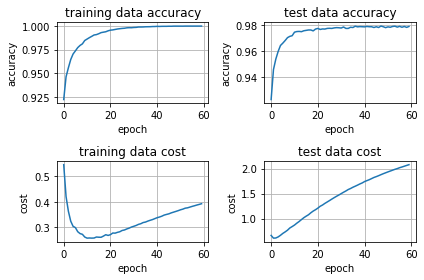

train accuray :  49998
train cost :  0.39245886443849964
test accuracy :  9791
test cost :  2.077522078174598
test accuracy :  9791
test cost :  3.029101756264872


In [67]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(0, 60, 1)

ax = plt.subplot(221)
y = [i/50000 for i in training_accuracy]
ax.plot(z, y)
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_title('training data accuracy')

ax = plt.subplot(222)
y = [i/10000 for i in evaluation_accuracy]
ax.plot(z, y)
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_title('test data accuracy')

ax = plt.subplot(223)
y = [i for i in training_cost]
ax.plot(z, y)
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('cost')
ax.set_title('training data cost')

ax = plt.subplot(224)
y = [i for i in evaluation_cost]
ax.plot(z, y)
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('cost')
ax.set_title('test data cost')

plt.tight_layout()
plt.show()

print("train accuray : ", training_accuracy[-1])
print("train cost : ", training_cost[-1])
print("test accuracy : ", evaluation_accuracy[-1])
print("test cost : ", evaluation_cost[-1])

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
print("test accuracy : ", net.accuracy(copy.deepcopy(test_data)))
print("test cost : ", net.total_cost(copy.deepcopy(test_data), 7.5, convert=True)) #lambda